In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
DEBUG=False

In [3]:
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


In [4]:
from disentangle.configs.sox2golgi_config import get_config
from disentangle.core.model_type import ModelType
from disentangle.core.data_split_type import DataSplitType
from disentangle.data_loader.multifile_dset import MultiFileDset

config = get_config()
datapath = '/group/jug/ashesh/data/TavernaSox2Golgi/'

normalized_input = config.data.normalized_input
use_one_mu_std = config.data.use_one_mu_std
train_aug_rotate = config.data.train_aug_rotate
enable_random_cropping = config.data.deterministic_grid is False
lowres_supervision = config.model.model_type == ModelType.LadderVAEMultiTarget

train_data_kwargs = {}
val_data_kwargs = {}
train_data_kwargs['enable_random_cropping'] = enable_random_cropping
val_data_kwargs['enable_random_cropping'] = False
padding_kwargs = None
if 'multiscale_lowres_count' in config.data and config.data.multiscale_lowres_count is not None:
    padding_kwargs = {'mode': config.data.padding_mode}
if 'padding_value' in config.data and config.data.padding_value is not None:
    padding_kwargs['constant_values'] = config.data.padding_value

train_data = MultiFileDset(config.data,
                            datapath,
                            datasplit_type=DataSplitType.Train,
                            val_fraction=config.training.val_fraction,
                            test_fraction=config.training.test_fraction,
                            normalized_input=normalized_input,
                            use_one_mu_std=use_one_mu_std,
                            enable_rotation_aug=train_aug_rotate,
                            padding_kwargs=padding_kwargs,
                            **train_data_kwargs)

max_val = train_data.get_max_val()
val_data = MultiFileDset(
    config.data,
    datapath,
    datasplit_type=DataSplitType.Val,
    val_fraction=config.training.val_fraction,
    test_fraction=config.training.test_fraction,
    normalized_input=normalized_input,
    use_one_mu_std=use_one_mu_std,
    enable_rotation_aug=False,  # No rotation aug on validation
    padding_kwargs=padding_kwargs,
    max_val=max_val,
    **val_data_kwargs,
)

mean_val, std_val = train_data.compute_mean_std()
train_data.set_mean_std(mean_val, std_val)
val_data.set_mean_std(mean_val, std_val)


Loaded from OneChannel /group/jug/ashesh/data/TavernaSox2Golgi/ 121
[SingleFileDset] Sz:64 Train:1 N:1 NumPatchPerN:256 NormInp:True SingleNorm:True Rot:False RandCrop:True Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0
MultiFileDset avg height: 1024, avg width: 1024, count: 121
Loaded from OneChannel /group/jug/ashesh/data/TavernaSox2Golgi/ 15
[SingleFileDset] Sz:64 Train:0 N:1 NumPatchPerN:256 NormInp:True SingleNorm:True Rot:False RandCrop:False Q:0.995 SummedInput:False ReplaceWithRandSample:False BckQ:0.0
MultiFileDset avg height: 1024, avg width: 1024, count: 15


In [5]:
inp, tar = val_data[0]

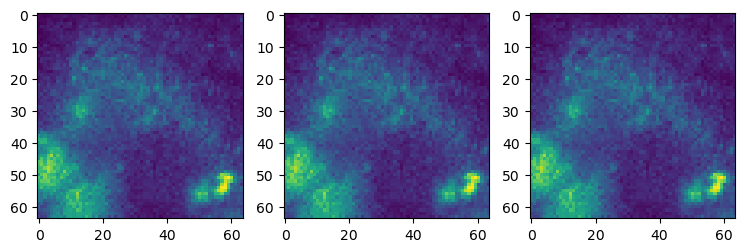

In [6]:
_,ax = plt.subplots(figsize=(9,3),ncols=3)
ax[0].imshow(inp[0])
ax[1].imshow(tar[0])
ax[2].imshow(tar[1])

In [7]:
inp.shape

(1, 64, 64)

In [8]:
inp_arr = []
for i in range(len(val_data)):
    inp, tar = val_data[i]
    inp_arr.append(inp)

In [9]:
inpdata= np.concatenate(inp_arr,axis=0)

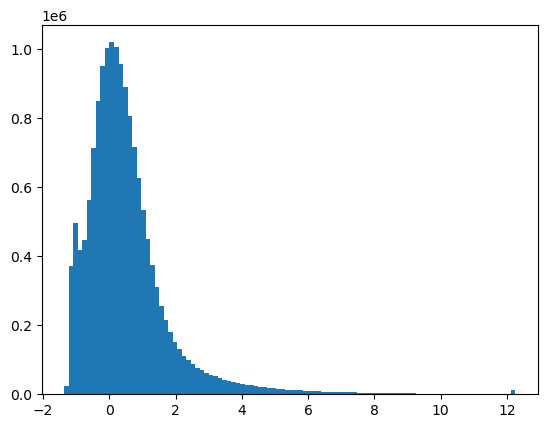

In [10]:
import matplotlib.pyplot as plt
_ = plt.hist(inpdata.flatten(),bins=100)

In [11]:
# import seaborn as sns
# sns.histplot(inpdata.flatten(),bins=100)

In [12]:
np.quantile(inpdata,[0.0, 0.01, 0.1, 0.5, 0.99,1])

array([-1.35542893, -1.1493119 , -0.72831666,  0.27736855,  6.13533545,
       12.25567436])